In [1]:
#For Analysis
import pandas as pd 
import numpy as np

#For Plotting
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

#For Modelling
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#read the csv file with pandas
walmart_data=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
#Display the first 5 rows
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#Display the last five rows
walmart_data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
#describe function to compute a summary of statistics
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
#checking for null values in my dataset
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# checking missing values for each row
walmart_data[walmart_data.isnull().any(axis=1)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [8]:
droprows= walmart_data.dropna()

In [9]:
print(walmart_data.shape,droprows.shape)

(6435, 8) (6435, 8)


In [10]:
#To know the datatype of the dataframe 
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
# To check for duplicates in the dataset
drop_duplicates= walmart_data.drop_duplicates(subset=['Store'])

In [12]:
print(walmart_data.shape,drop_duplicates.shape)

(6435, 8) (45, 8)


In [13]:
# Convert date to datetime(year,month,date) datatype format
walmart_data['Date'] =  pd.to_datetime(walmart_data['Date'])

In [14]:
#To check that date has been converted to datetime datatype
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
# Sorting by weekly_sales and date from lowest to highest
sorted_walmart_data = walmart_data.sort_values([ 'Weekly_Sales','Date'], ascending=[1,1])

In [16]:
# To find out the Store with the minimum and maximum weekly_sales
# Store 33 has the lowest weekly_sale figure while store 14 has the highest weekly_sale figure
sorted_walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265
4614,33,2010-10-29,213538.32,0,71.34,3.130,126.436419,9.265
4675,33,2011-12-30,215359.21,1,51.60,3.428,130.071032,8.010
4623,33,2010-12-31,219804.85,1,52.91,3.148,127.087677,9.265
4671,33,2011-02-12,220060.35,0,59.12,3.701,129.845967,8.010
...,...,...,...,...,...,...,...,...
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484


In [17]:
# Store 33 has the lowest weekly_sales on 2010/03/12(yy/mm/dd)
sorted_walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265
4614,33,2010-10-29,213538.32,0,71.34,3.130,126.436419,9.265
4675,33,2011-12-30,215359.21,1,51.60,3.428,130.071032,8.010
4623,33,2010-12-31,219804.85,1,52.91,3.148,127.087677,9.265
4671,33,2011-02-12,220060.35,0,59.12,3.701,129.845967,8.010


In [18]:
#store 14 has the highest weekly_sale on the 2010/12/24(yy/mm/dd)
sorted_walmart_data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724


In [19]:
#To determine the total of all Weekly_sales per store
total_weeklysales= walmart_data.groupby('Store')['Weekly_Sales'].sum()

In [20]:
#Store 20  has the maximum number of sales
print (total_weeklysales.index[total_weeklysales.argmax()])

20


In [21]:
#Display the total sum of all weekly sales for store20
print ("{:.2f}".format(total_weeklysales.max()))

301397792.46


In [22]:
#To determine the store that has the minumum total Weekly_sales
print (total_weeklysales.index[total_weeklysales.argmin()])

33


In [23]:
#Display the total sum of all weekly sales for store33
print ("{:.2f}".format(total_weeklysales.min()))

37160221.96


<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

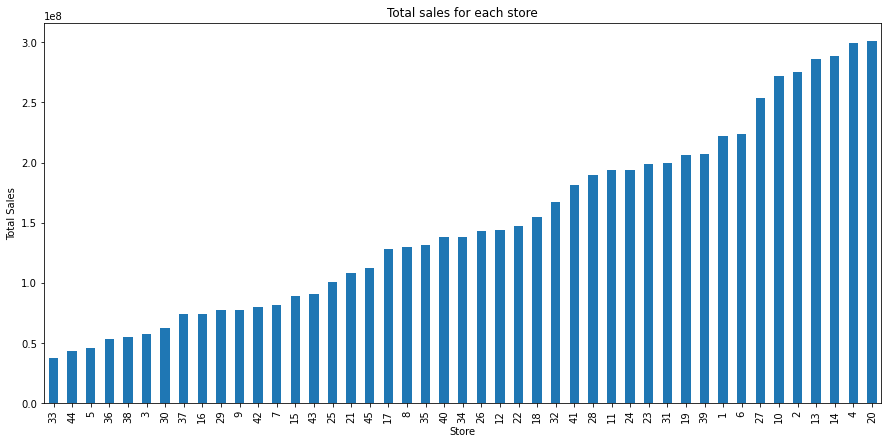

In [24]:
total_sales= walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='sci', axis='y',scilimits=(0,0))
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

In [25]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [26]:
#Adding another columns to depict holiday# This to provide clarity for the reader
def holiday(walmart_data):
    if walmart_data in ['Holiday_Flag',(1) ]:
        return 'holiday'
    else:
        return 'no holiday'

In [27]:
walmart_data['Week_Hols'] =walmart_data['Holiday_Flag'].apply(holiday)

In [28]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Hols
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,no holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,holiday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,no holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,no holiday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,no holiday


In [35]:
walmart_data['Day']= pd.DatetimeIndex(walmart_data['Date']).day
walmart_data['Month'] = pd.DatetimeIndex(walmart_data['Date']).month
walmart_data['Year'] = pd.DatetimeIndex(walmart_data['Date']).year
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Hols,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,no holiday,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,holiday,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,no holiday,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,no holiday,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,no holiday,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,no holiday,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,no holiday,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,no holiday,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,no holiday,19,10,2012


In [38]:
#to differentiate by quarter using nested if statement.
def Quarter(walmart_data):
    if walmart_data in ['Month',(1), (2), (3) ]:
        return 'Q1'
    else:
        if walmart_data in ['Month',(4), (5), (6) ]:
            return 'Q2'
        else:
            if walmart_data in ['Month',(7), (8), (9) ]:
                return 'Q3'
            if walmart_data in ['Month',(10), (11), (12) ]:
                return 'Q4'

In [39]:
walmart_data['Quarter'] =walmart_data['Month'].apply(Quarter)

In [40]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Hols,Day,Month,Year,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,no holiday,2,5,2010,Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,holiday,2,12,2010,Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,no holiday,19,2,2010,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,no holiday,26,2,2010,Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,no holiday,3,5,2010,Q2


In [41]:
walmart_data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Hols,Day,Month,Year,Quarter
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,no holiday,28,9,2012,Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,no holiday,10,5,2012,Q2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,no holiday,10,12,2012,Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,no holiday,19,10,2012,Q4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,no holiday,26,10,2012,Q4


In [43]:
#To make data clearer to read: convert numbers to months by creating dictionary
month_dict= { 1: "Jan", 2: "Feb", 3: "Mar" ,4:  "Apr", 5: "May", 6: "June", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11:"Nov",12:"Dec"}

In [44]:
#Apply dictionary
walmart_data['Month']= walmart_data['Month'].apply(lambda x : month_dict[x])

In [45]:
#read the updated data
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Hols,Day,Month,Year,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,no holiday,2,May,2010,Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,holiday,2,Dec,2010,Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,no holiday,19,Feb,2010,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,no holiday,26,Feb,2010,Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,no holiday,3,May,2010,Q2


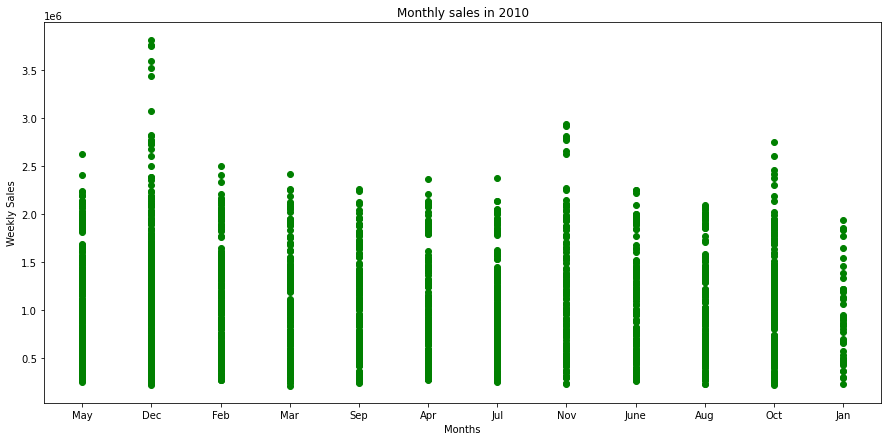

In [46]:
#Monthly Sales per year
plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2010]["Month"],walmart_data[walmart_data.Year==2010]["Weekly_Sales"], color='green')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in 2010")
plt.show()


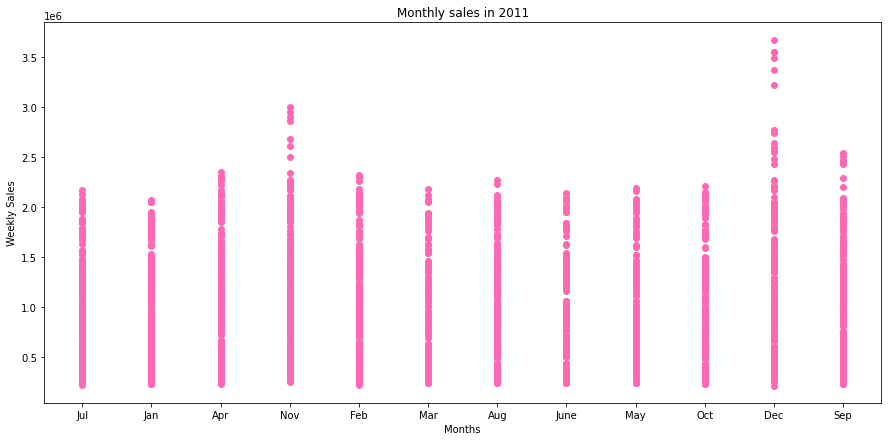

In [47]:
plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2011]["Month"],walmart_data[walmart_data.Year==2011]["Weekly_Sales"], color='hotpink')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in 2011")
plt.show()

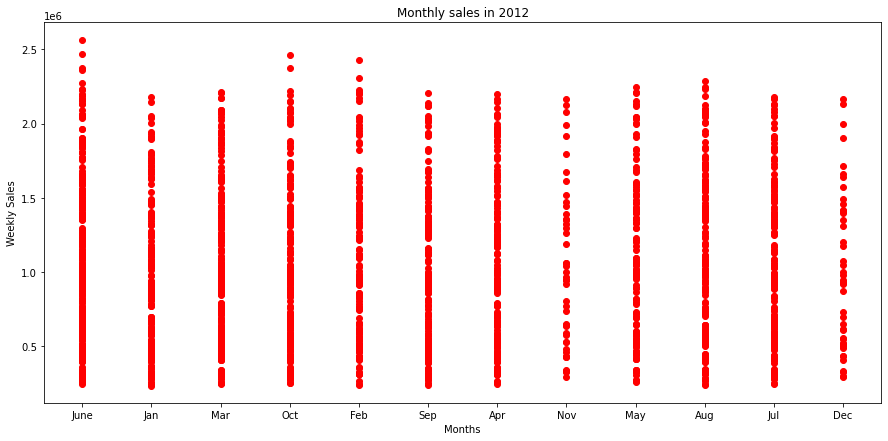

In [48]:
#In 2012, the month of June recorded the highest number of sales
plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2012]["Month"],walmart_data[walmart_data.Year==2012]["Weekly_Sales" ],color='red')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in 2012")
plt.show()

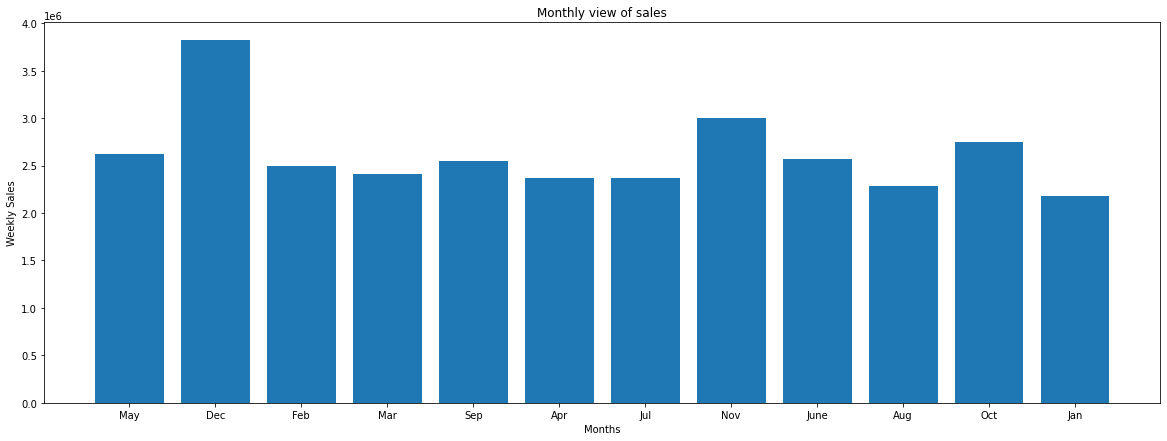

In [50]:
#Overall Monthly Sales
plt.figure(figsize=(20,7))
plt.bar(walmart_data["Month"],walmart_data["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

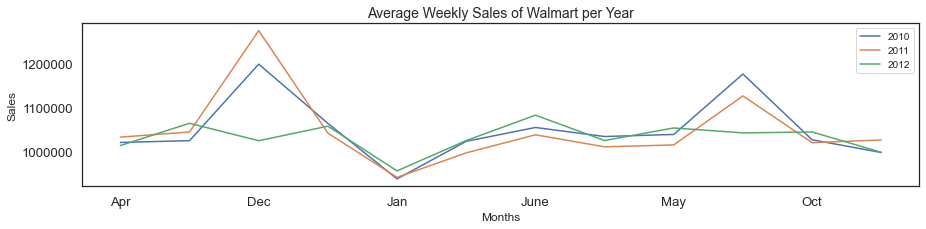

In [82]:
#Seasonal behaviour through 2010,2011 and 2012.
plt.figure(figsize=(15,3))
plt.ticklabel_format(useOffset=False, style='plain', axis='y' )
walmart_data[walmart_data['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
walmart_data[walmart_data['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
walmart_data[walmart_data['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average Weekly Sales of Walmart per Year', fontsize=14)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=10)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Months', fontsize=12);

<Figure size 432x216 with 0 Axes>

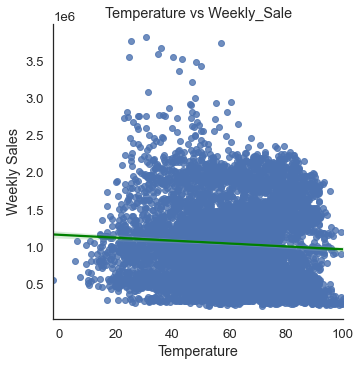

In [58]:
#To depict the relationship between Temperature and weekly_sales
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style= "white")
sns.lmplot( x='Temperature', y='Weekly_Sales', data= walmart_data,line_kws={'color':'green'} )
plt.title("Temperature vs Weekly_Sale")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

<Figure size 432x216 with 0 Axes>

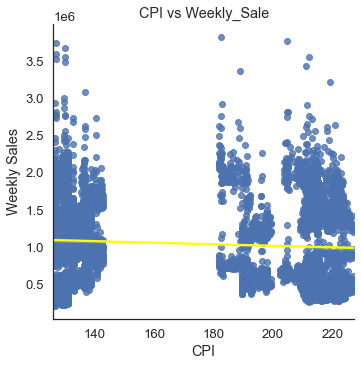

In [54]:
#To depict the relationship between CPI and weekly_sales
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style= "white")
sns.lmplot( x='CPI', y='Weekly_Sales', data= walmart_data,line_kws={'color':'yellow'} )
plt.title("CPI vs Weekly_Sale")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.show()

<Figure size 432x216 with 0 Axes>

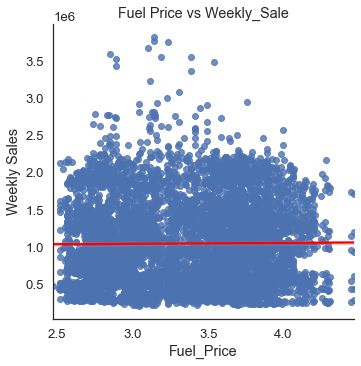

In [55]:
#To determine the relationship betwwen Fuel price and Weekly Sales
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style= "white")
sns.lmplot( x='Fuel_Price', y='Weekly_Sales', data= walmart_data,line_kws={'color':'red'} )
plt.title("Fuel Price vs Weekly_Sale")
plt.xlabel("Fuel_Price")
plt.ylabel("Weekly Sales")
plt.show()

<Figure size 432x216 with 0 Axes>

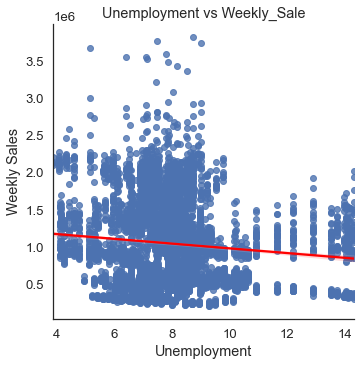

In [74]:
#To determine the relationship betwwen Unemployment and Weekly Sales
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style= "white")
sns.lmplot( x='Unemployment', y='Weekly_Sales', data= walmart_data,line_kws={'color':'red'} )
plt.title("Unemployment vs Weekly_Sale")
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.show()

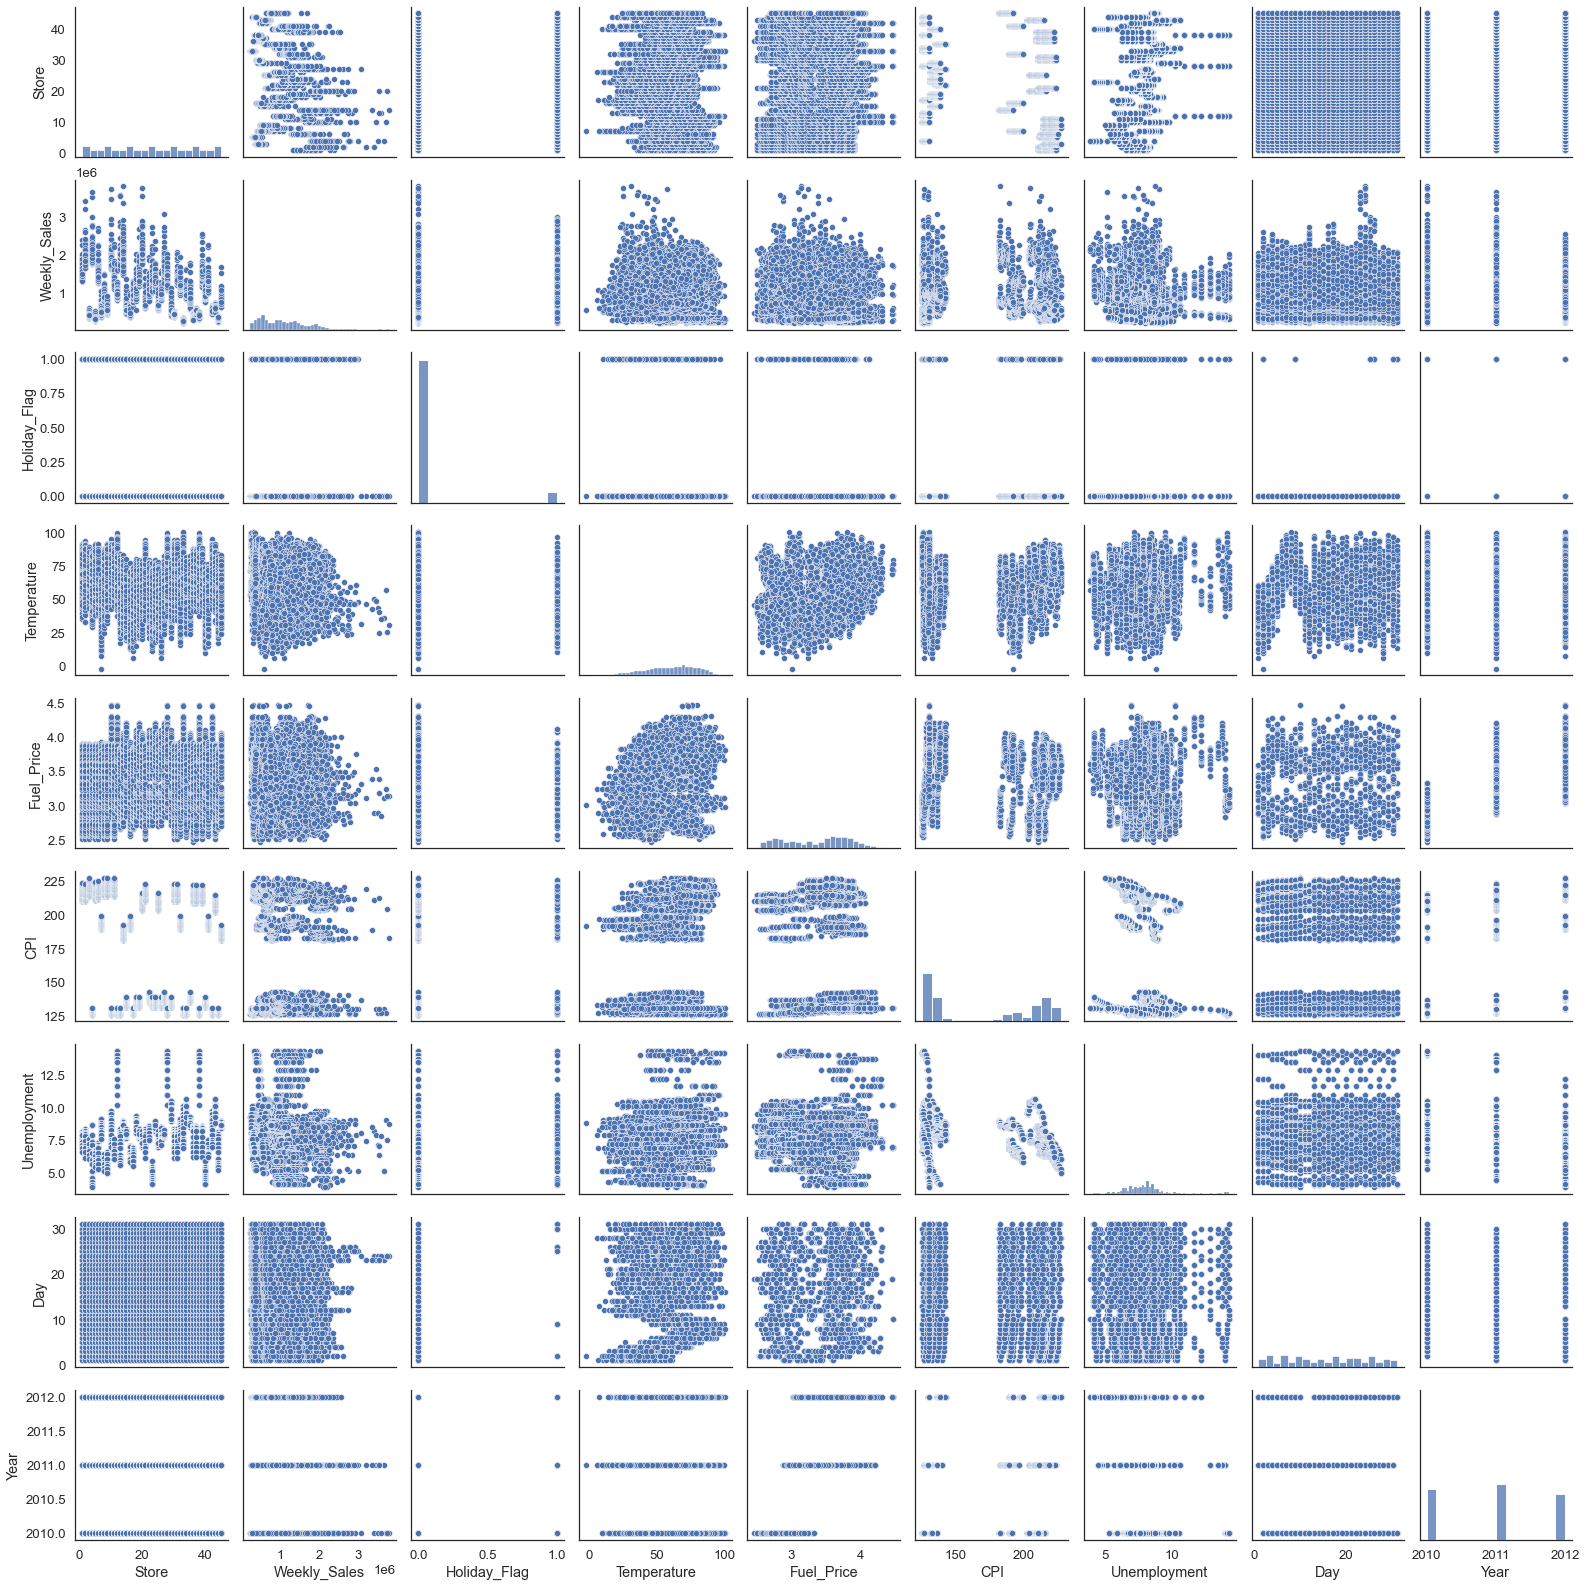

In [63]:
sns.pairplot(walmart_data)

In [64]:
#Defining holiday dates
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [69]:
#Calculating mean sales on holidays : 
Super_Bowl = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl,Labour_Day,Thanksgiving,Christmas

(1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.1115555551)

In [66]:
#Average sales on non-holidays :
Non_Holiday_Sales = walmart_data[walmart_data['Week_Hols'] == 'no holiday' ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088564

In [67]:
#Average sales on holidays :
Holiday_Sales = walmart_data[walmart_data['Week_Hols'] == 'holiday' ]['Weekly_Sales'].mean()
Holiday_Sales

1122887.8923555554

<AxesSubplot:>

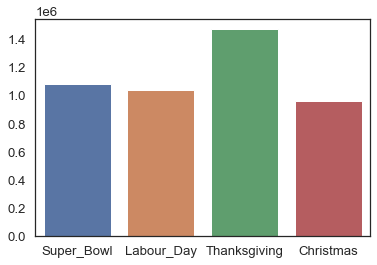

In [70]:
#Thankging recorded the higehst sales out of all the holidays
month = ['Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']
sales = [1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.1115555551]
sns.barplot(x= month, y= sales)

In [71]:
#creating a new dataframe to join 2dataframes together.
Cities = pd.DataFrame ({"Store": ['1', '2', '3', '4','5', '6', '7', '8', '9','10','11', '12', '13', '14','15', '16', '17', '18', '19','20','21','22', '23', '24','25', '26', '27', '28', '29', '30', '31', '32','33', '34','35', '36', '37', '38', '39','40', '41','42', '43', '44', '45'],
                    "City": ['LA', 'Chicago', 'Houston','Phoenix', 'Phil', 'S.Antonio','S.Diego','Dallas','S.Jose','Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Charlotte' , 'S. Francisco','Indianapolis','Seattle','Denver','Washington','Houston','Paso','Nashville','Detroit','Oklahoma' ,'Portland','Las Vegas','Memphis', 'Louisville','Baltimore','Milwaukee','Albuquerque','Tucson','FresnoMesa','Sacramento','Atlanta','Kansas City','Colorado', 'Springs','Omah','Raleigh','Miami','L.Beach','Virginia','Oakland', 'Lagos']})


In [73]:
Cities.head()

,Store,City
0,1,LA
1,2,Chicago
2,3,Houston
3,4,Phoenix
4,5,Phil


In [75]:
pd.concat([walmart_data,Cities] )

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Hols,Day,Month,Year,Quarter,City
0,1,2010-05-02,1643690.90,0.0,42.31,2.572,211.096358,8.106,no holiday,2.0,May,2010.0,Q2,NaN
1,1,2010-12-02,1641957.44,1.0,38.51,2.548,211.242170,8.106,holiday,2.0,Dec,2010.0,Q4,NaN
2,1,2010-02-19,1611968.17,0.0,39.93,2.514,211.289143,8.106,no holiday,19.0,Feb,2010.0,Q1,NaN
3,1,2010-02-26,1409727.59,0.0,46.63,2.561,211.319643,8.106,no holiday,26.0,Feb,2010.0,Q1,NaN
4,1,2010-05-03,1554806.68,0.0,46.50,2.625,211.350143,8.106,no holiday,3.0,May,2010.0,Q2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,41,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miami
41,42,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.Beach
42,43,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Virginia
43,44,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oakland


In [77]:
X = walmart_data[['Temperature']] # Pass in a list, expecting a 2D array
y = walmart_data['Weekly_Sales']

In [78]:
#Just to show that linear regression would not work 
reg = LinearRegression().fit(X, y)